<a href="https://colab.research.google.com/github/barkhahbpp/sistem-cerdas/blob/main/Lung_Cancer_MLP_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Lung Cancer dengan Menggunakan MLP #

Dataset : https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

**Nama : Barkhah Pudya Permana**

**NIM : 22/509244/PTK/14895**

**Mata Kuliah : Sistem Cerdas**

## Load Dataset ##

Detil Fitur Data adalah sebagai berikut :

|Field name|Description|
|--- |--- |
|Age	|The age of the patient. (Numeric)|
|Gender	|The gender of the patient. (Categorical)|
|Air Pollution |The level of air pollution exposure of the patient. (Categorical)|
|Alcohol use	|The level of alcohol use of the patient. (Categorical)|
|Dust Allergy	|The level of dust allergy of the patient. (Categorical)|
|OccuPational Hazards	|The level of occupational hazards of the patient. (Categorical)|
|Genetic Risk	|The level of genetic risk of the patient. (Categorical)|
|chronic Lung Disease	|The level of chronic lung disease of the patient. (Categorical)|
|Balanced Diet	|The level of balanced diet of the patient. (Categorical)|
|Obesity	|The level of obesity of the patient. (Categorical)|
|Smoking	|The level of smoking of the patient. (Categorical)|
|Passive Smoker	|The level of passive smoker of the patient. (Categorical)|
|Chest Pain	|The level of chest pain of the patient. (Categorical)|
|Coughing of Blood	|The level of coughing of blood of the patient. (Categorical)|
|Fatigue	|The level of fatigue of the patient. (Categorical)|
|Weight Loss	|The level of weight loss of the patient. (Categorical)|
|Shortness of Breath	|The level of shortness of breath of the patient. (Categorical)|
|Wheezing	|The level of wheezing of the patient. (Categorical)|
|Swallowing Difficulty	|The level of swallowing difficulty of the patient. (Categorical)|
|Clubbing of Finger Nails	|The level of clubbing of finger nails of the patient. (Categorical)|

In [66]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Berikut adalah proses Load Data

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [68]:
lungCr_df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/cancer patient data sets.csv')
lungCr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [69]:
lungCr_df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


## Data Preprocessiong ##

In [70]:
# Cek Record Redundant
sum(lungCr_df.duplicated())

0

In [71]:
# cek PAtient ID Duplicate
sum(lungCr_df["Patient Id"].duplicated())

0

In [72]:
# Convert data ke Category
lungCr_df["Gender"] = lungCr_df["Gender"].astype('category')
lungCr_df["Level"] = lungCr_df["Level"].replace({'Low':0,'Medium':1,"High":2})
lungCr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   index                     1000 non-null   int64   
 1   Patient Id                1000 non-null   object  
 2   Age                       1000 non-null   int64   
 3   Gender                    1000 non-null   category
 4   Air Pollution             1000 non-null   int64   
 5   Alcohol use               1000 non-null   int64   
 6   Dust Allergy              1000 non-null   int64   
 7   OccuPational Hazards      1000 non-null   int64   
 8   Genetic Risk              1000 non-null   int64   
 9   chronic Lung Disease      1000 non-null   int64   
 10  Balanced Diet             1000 non-null   int64   
 11  Obesity                   1000 non-null   int64   
 12  Smoking                   1000 non-null   int64   
 13  Passive Smoker            1000 non-null   int64  

In [73]:
# lungCr_df.describe().to_excel("gdrive/MyDrive/Colab Notebooks/desc_stat.xlsx", index=False)
lungCr_df.describe()

,index,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,288.819436,12.005493,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,0.000000,14.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,249.750000,27.750000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,499.500000,36.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,749.250000,45.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,999.000000,73.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


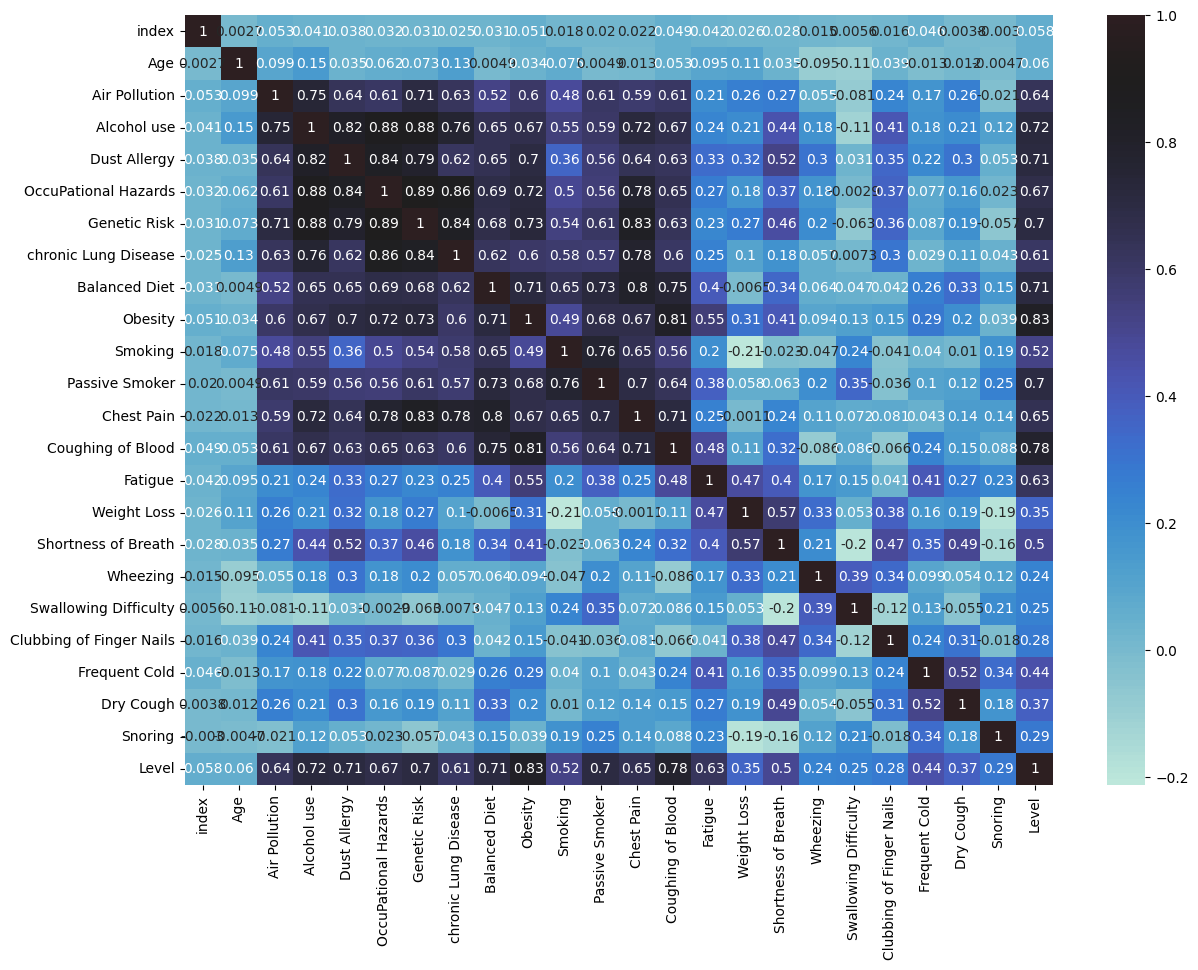

In [74]:
%matplotlib inline
plt.figure(figsize=(14,10))

sns.heatmap(lungCr_df.corr(), annot=True, center=0.9)
plt.show()


In [75]:
# Class Encoding
y = lungCr_df["Level"]
y

0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64

In [76]:
y_enc = pd.get_dummies(lungCr_df["Level"])
print(y_enc)

     0  1  2
0    1  0  0
1    0  1  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
995  0  0  1
996  0  0  1
997  0  0  1
998  0  0  1
999  0  0  1

[1000 rows x 3 columns]


In [77]:
lungCr_df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

## Feature Selection ##

Klasifikasi dengan sebagian Feature yang memiliki Korelasi Tinggi

In [78]:
# Pertahankan kolom 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood'
# Hapus sisanya

X = lungCr_df.drop(['index', 'Patient Id', 'Age', 'Gender', 'Weight Loss', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'], axis=1)
print(X.info())
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Air Pollution         1000 non-null   int64
 1   Alcohol use           1000 non-null   int64
 2   Dust Allergy          1000 non-null   int64
 3   OccuPational Hazards  1000 non-null   int64
 4   Genetic Risk          1000 non-null   int64
 5   chronic Lung Disease  1000 non-null   int64
 6   Balanced Diet         1000 non-null   int64
 7   Obesity               1000 non-null   int64
 8   Smoking               1000 non-null   int64
 9   Passive Smoker        1000 non-null   int64
 10  Chest Pain            1000 non-null   int64
 11  Coughing of Blood     1000 non-null   int64
 12  Fatigue               1000 non-null   int64
 13  Shortness of Breath   1000 non-null   int64
dtypes: int64(14)
memory usage: 109.5 KB
None


,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Shortness of Breath
0,2,4,5,4,3,2,2,4,3,2,2,4,3,2
1,3,1,5,3,4,2,2,2,2,4,2,3,1,7
2,4,5,6,5,5,4,6,7,2,3,4,8,8,9
3,7,7,7,7,6,7,7,7,7,7,7,8,4,3
4,6,8,7,7,7,6,7,7,8,7,7,9,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,7,7,7,7,6,7,7,7,8,7,7,5,2
996,6,8,7,7,7,6,7,7,7,8,7,7,9,5
997,4,5,6,5,5,4,6,7,2,3,4,8,8,9
998,6,8,7,7,7,6,7,7,8,7,7,9,3,4


## Build Train and Test Dataset ##

In [79]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 382 to 37
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Air Pollution         800 non-null    int64
 1   Alcohol use           800 non-null    int64
 2   Dust Allergy          800 non-null    int64
 3   OccuPational Hazards  800 non-null    int64
 4   Genetic Risk          800 non-null    int64
 5   chronic Lung Disease  800 non-null    int64
 6   Balanced Diet         800 non-null    int64
 7   Obesity               800 non-null    int64
 8   Smoking               800 non-null    int64
 9   Passive Smoker        800 non-null    int64
 10  Chest Pain            800 non-null    int64
 11  Coughing of Blood     800 non-null    int64
 12  Fatigue               800 non-null    int64
 13  Shortness of Breath   800 non-null    int64
dtypes: int64(14)
memory usage: 93.8 KB


In [80]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 507 to 207
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Air Pollution         200 non-null    int64
 1   Alcohol use           200 non-null    int64
 2   Dust Allergy          200 non-null    int64
 3   OccuPational Hazards  200 non-null    int64
 4   Genetic Risk          200 non-null    int64
 5   chronic Lung Disease  200 non-null    int64
 6   Balanced Diet         200 non-null    int64
 7   Obesity               200 non-null    int64
 8   Smoking               200 non-null    int64
 9   Passive Smoker        200 non-null    int64
 10  Chest Pain            200 non-null    int64
 11  Coughing of Blood     200 non-null    int64
 12  Fatigue               200 non-null    int64
 13  Shortness of Breath   200 non-null    int64
dtypes: int64(14)
memory usage: 23.4 KB


In [81]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 800 entries, 382 to 37
Series name: Level
Non-Null Count  Dtype
--------------  -----
800 non-null    int64
dtypes: int64(1)
memory usage: 12.5 KB


In [82]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 200 entries, 507 to 207
Series name: Level
Non-Null Count  Dtype
--------------  -----
200 non-null    int64
dtypes: int64(1)
memory usage: 3.1 KB


## MLP Classification ##

Klasifikasi berdasarkan nilai korelasi feature yang tinggi

In [83]:
import warnings

warnings.filterwarnings("ignore")

Iteration 1, loss = 4.57152483
Iteration 2, loss = 2.84119396
Iteration 3, loss = 1.66050975
Iteration 4, loss = 1.17252902
Iteration 5, loss = 1.27736393
Iteration 6, loss = 1.26925500
Iteration 7, loss = 1.14693634
Iteration 8, loss = 1.06208298
Iteration 9, loss = 0.97695558
Iteration 10, loss = 0.90965374
Iteration 11, loss = 0.89595762
Iteration 12, loss = 0.86536771
Iteration 13, loss = 0.82193776
Iteration 14, loss = 0.79239246
Iteration 15, loss = 0.77280208
Iteration 16, loss = 0.74512645
Iteration 17, loss = 0.72070695
Iteration 18, loss = 0.69878691
Iteration 19, loss = 0.67723366
Iteration 20, loss = 0.65692532
Iteration 21, loss = 0.63801860
Iteration 22, loss = 0.61961565
Iteration 23, loss = 0.60206081
Iteration 24, loss = 0.58575227
Iteration 25, loss = 0.56999626
Iteration 26, loss = 0.55460233
Iteration 27, loss = 0.54042744
Iteration 28, loss = 0.52546657
Iteration 29, loss = 0.51156046
Iteration 30, loss = 0.49791530
Iteration 31, loss = 0.48527675
Iteration 32, los

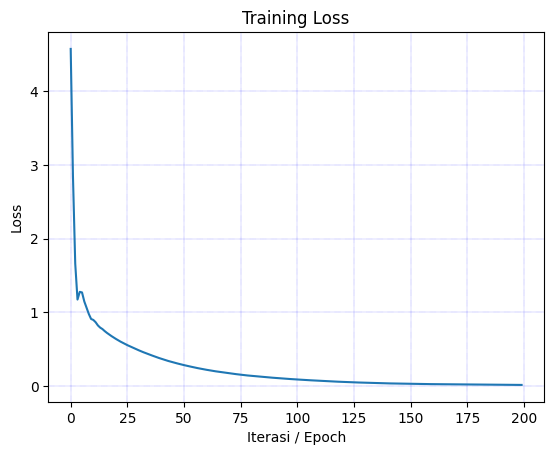

In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix

model = MLPClassifier(verbose=True)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(classification_report(y_test, y_predict))
print('Confusion matrix:\n', confusion_matrix(y_test, y_predict))
print('\n')

plt.title(label="Training Loss")
plt.xlabel(xlabel="Iterasi / Epoch")
plt.ylabel(ylabel="Loss")
plt.grid(color='blue', linestyle='dotted', linewidth=0.3)
plt.plot(model.loss_curve_)
plt.show()

## Tune MLP ##

### Tunning 1 ###

Tuning 1 mencari konfigurasi hiperparameter :

1.   Activation Function : identity, logistic, tanh, relu
2.   Solver optimizer : lbfgs, sgd, adam
3.   Learning Rate : constant, invscaling, adaptive

In [85]:
#X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=1)

cv = ShuffleSplit(n_splits=1, test_size=0.2)

param = {
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam'],
    'learning_rate':['constant','invscaling','adaptive']}

#gridSearch = GridSearchCV(MLPClassifier(), param_grid=param, cv=cv, scoring=['recall','f1'], refit='f1', verbose=3)
gridSearch = GridSearchCV(MLPClassifier(), param_grid=param, cv=cv, scoring='accuracy', verbose=3)

gridSearch.fit(X_train, y_train)

print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 36 candidates, totalling 36 fits
[CV 1/1] END activation=identity, learning_rate=constant, solver=lbfgs;, score=1.000 total time=   0.3s
[CV 1/1] END activation=identity, learning_rate=constant, solver=sgd;, score=0.863 total time=   0.7s
[CV 1/1] END activation=identity, learning_rate=constant, solver=adam;, score=0.919 total time=   0.8s
[CV 1/1] END activation=identity, learning_rate=invscaling, solver=lbfgs;, score=1.000 total time=   0.3s
[CV 1/1] END activation=identity, learning_rate=invscaling, solver=sgd;, score=0.581 total time=   0.0s
[CV 1/1] END activation=identity, learning_rate=invscaling, solver=adam;, score=0.894 total time=   0.8s
[CV 1/1] END activation=identity, learning_rate=adaptive, solver=lbfgs;, score=1.000 total time=   0.3s
[CV 1/1] END activation=identity, learning_rate=adaptive, solver=sgd;, score=0.844 total time=   1.2s
[CV 1/1] END activation=identity, learning_rate=adaptive, solver=adam;, score=0.906 total time=   1.5s
[CV 1/

### Tunning 2 ###

Tunning 1 menghasilkan konfiguasi Hiperparameter optimal sbb:

|Parameter| Value|
|---|---|
|activation | identity|
|learning_rate | constant|
|solver |lbfgs|

Tunning 2 mencari konfigurasi hiperparameter hidden_layer_sizes :
5, 10, 15, (5, 5), (5, 10)

*   5       : Jumlah hidden layer 1, jumlah neurons 5
*   10      : Jumlah hidden layer 1, jumlah neurons 10
*   15      : Jumlah hidden layer 1, jumlah neurons 15
*   (5, 5)  : JUmlah hidden layer 2, jumlah neurons per hidden layer 5
*   (5, 10)  : JUmlah hidden layer 2, jumlah neurons 5 (HL 1) dan 10 (HL 2)







In [86]:
param_grid = {
    'hidden_layer_sizes':[5,10,15,(5,5),(5,10)],
    'activation': ['identity'],
    'solver': ['lbfgs'],
    'learning_rate':['constant']
}

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,
                          scoring='accuracy',verbose=3)
gridSearch.fit(X_train, y_train)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 5 candidates, totalling 5 fits
[CV 1/1] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, solver=lbfgs;, score=1.000 total time=   0.2s
[CV 1/1] END activation=identity, hidden_layer_sizes=10, learning_rate=constant, solver=lbfgs;, score=1.000 total time=   0.1s
[CV 1/1] END activation=identity, hidden_layer_sizes=15, learning_rate=constant, solver=lbfgs;, score=1.000 total time=   0.1s
[CV 1/1] END activation=identity, hidden_layer_sizes=(5, 5), learning_rate=constant, solver=lbfgs;, score=0.944 total time=   0.2s
[CV 1/1] END activation=identity, hidden_layer_sizes=(5, 10), learning_rate=constant, solver=lbfgs;, score=1.000 total time=   0.2s
Score:  1.0
Parameters:  {'activation': 'identity', 'hidden_layer_sizes': 5, 'learning_rate': 'constant', 'solver': 'lbfgs'}


### Tunning 3 ###

Tunning 2 menghasilkan konfiguasi Hiperparameter optimal sbb:

|Parameter| Value|
|---|---|
|activation | identity|
|learning_rate | conatant|
|solver |lbfgs|
|hidden_layer_sizes | 5|

Tunning 3 mencari hiperparameter
1.   alpha : 0, 0.0005, 0.0001, 0.0005, 0.001
2.   learning_rate_init : 0, 0.0001, 0.0005, 0.001, 0.005, 0.01
3.   max_iter : 200, 500
4.   shuffle : True, False

In [87]:
param_grid = {
    'hidden_layer_sizes':[5,10,15,(5,5),(5,10)],
    'activation': ['identity'],
    'solver': ['lbfgs'],
    'alpha': [0,0.0005,0.0001,0.0005,0.001],
    'learning_rate':['constant'],
    'learning_rate_init': [0,0.0001,0.0005,0.001,0.005,0.01],
    'max_iter': [200,500],
    'shuffle': [True,False]
}

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,
                          scoring='accuracy',verbose=3)
gridSearch.fit(X_train, y_train)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 600 candidates, totalling 600 fits
[CV 1/1] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=constant, learning_rate_init=0, max_iter=200, shuffle=True, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/1] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=constant, learning_rate_init=0, max_iter=200, shuffle=False, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/1] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=constant, learning_rate_init=0, max_iter=500, shuffle=True, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/1] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=constant, learning_rate_init=0, max_iter=500, shuffle=False, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/1] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=constant, learning_rate_init=0.0001, max_iter=200, shuffle=True, solver=lbfgs;, score=1.000 total time=   0.1s
[CV 1/1] END 

### Tunning 4 ###

Tunning 2 menghasilkan konfigurasi Hiperparameter optimal sbb:

|Parameter| Value|
|---|---|
|activation | identity|
|learning_rate | constant|
|solver |lbfgs|
|hidden_layer_sizes | 5|
|alpha | 0|
|learning_rate_init | 0.0001|
|max_iter | 200|
|shuffle | True|

Tunning 3 mencari parameter random_state paling optimal. Random_state diiterasi dari 0 hingga 14. Dri hypermapameter existing didapatkan semua random state optimal menghasilkan akurasi 100%

In [88]:
X_train_s, X_tune, y_train_s, y_tune = train_test_split(X_train, y_train, test_size=0.2)

for i in range(15):
  tunmlp = MLPClassifier(activation='identity', hidden_layer_sizes=5, learning_rate='constant',
                         learning_rate_init=0.0001, max_iter=200, shuffle=True, solver='lbfgs', random_state=i)

  tunmlp.fit(X_train_s, y_train_s)
  y_pred_tun = tunmlp.predict(X_tune)

  print(i, classification_report(y_tune, y_pred_tun))



0               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        63

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

1               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        63

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

2               precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.96      1.00      0.98        47
           2       1.00      1.00      1.00        63

    accuracy  

### Final Classification ###

Klasifikasi Final menggunakan hyperparameter :

|Parameter| Value|
|---|---|
|activation | Identity|
|learning_rate | constant|
|solver |lbfgs|
|hidden_layer_sizes | 5|
|alpha | 0|
|learning_rate_init | 0.0001|
|max_iter | 200|
|shuffle | True|
|random_state | 7|

Result :

Precision = 100%,
recall = 100%,
f1-score = 100%

[learning_curve] Training set sizes: [  1  37  73 110 146 183 219 256 292 329 365 402 438 475 512]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  75 | elapsed:    7.4s remaining:   15.8s
[Parallel(n_jobs=4)]: Done  50 out of  75 | elapsed:   11.2s remaining:    5.6s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   14.4s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        76

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matirx: 
 [[62  0  0]
 [ 0 62  0]
 [ 0  0 76]]




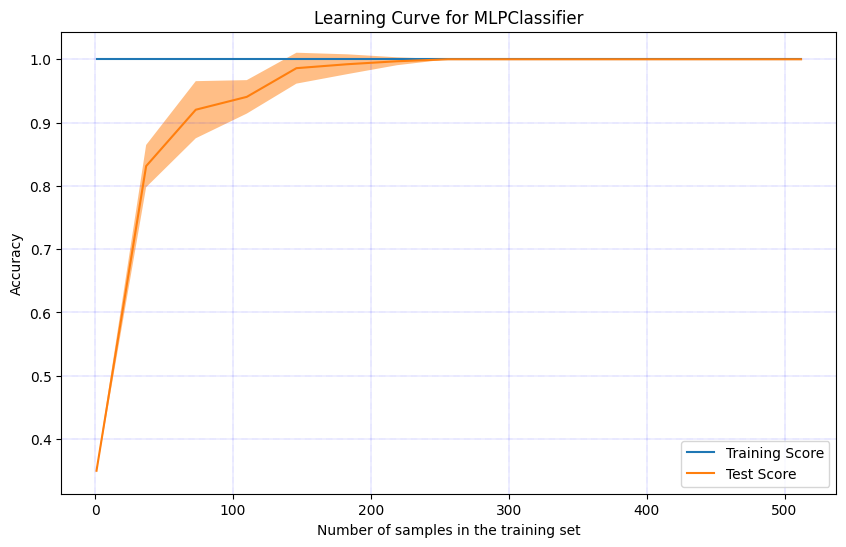

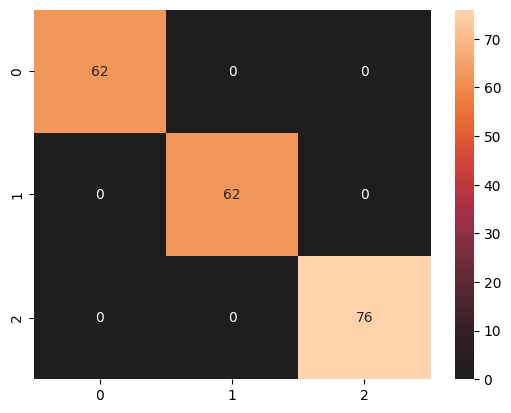

In [89]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.metrics import accuracy_score

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train_s,
    "y": y_train_s,
    "train_sizes": np.linspace(0.001, 1.0, 15),
    "score_type": "both",
    "score_name": "Accuracy",
    "verbose": 3,
    "n_jobs": 4,
    "std_display_style": "fill_between",
    "scoring": "accuracy"
}

finalmlp = MLPClassifier(activation='identity', hidden_layer_sizes=5, learning_rate='constant',
                         learning_rate_init=0.0001, max_iter=200, shuffle=True, solver='lbfgs', random_state=7, verbose=True)
finalmlp.fit(X_train_s, y_train_s)
y_pred = finalmlp.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

LearningCurveDisplay.from_estimator(finalmlp, **common_params, ax=ax.axes)
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training Score", "Test Score"])
ax.set_title(f"Learning Curve for {finalmlp.__class__.__name__}")

print(classification_report(y_test, y_pred))
print('Confusion Matirx: \n', confusion)
print('\n')
plt.grid(color='blue', linestyle='dotted', linewidth=0.3)
plt.show()

sns.heatmap(confusion, annot=True, center=0.5)
plt.show()